In [151]:
import pandas as pd 
import numpy as np 
import scipy

import math 
import matplotlib.pyplot as plt 
import seaborn as sn 

In [153]:
df = pd.read_csv(r"C:\Users\kajoo\Desktop\programing\archive (1)\Sales Transaction v.4a.csv")

df.head(5)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [155]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [157]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'CustomerNo'}>, <Axes: >]], dtype=object)

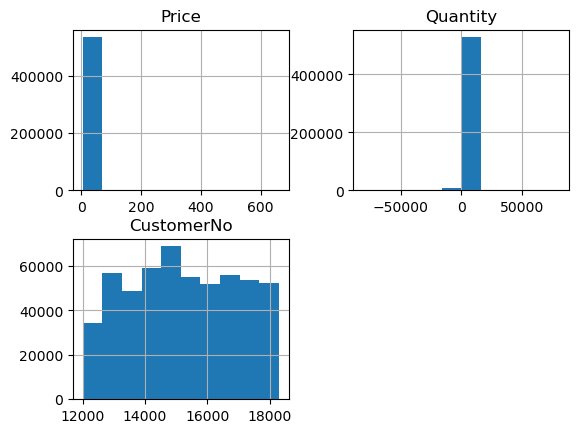

In [159]:
df.hist()

In [161]:
df["Price"].min()

5.13

In [559]:
df.Country.nunique()

38

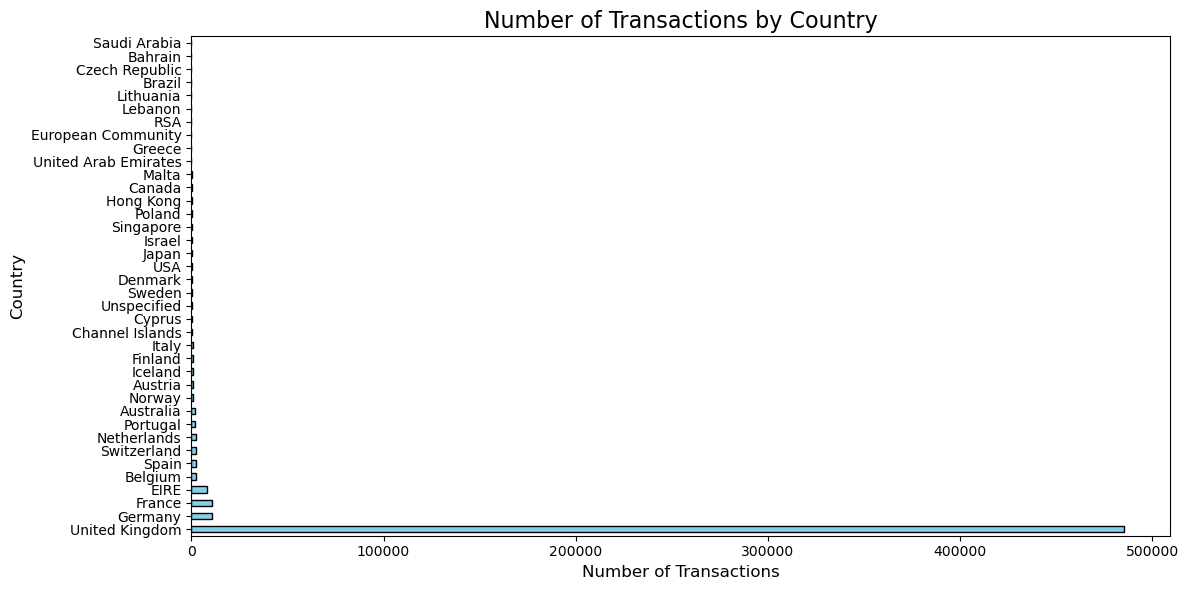

In [209]:
country = df.groupby("Country")["TransactionNo"].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
country.plot(kind="barh", color="skyblue", edgecolor="black")

# Make it look better
plt.title("Number of Transactions by Country", fontsize=16)
plt.xlabel("Number of Transactions", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [229]:
products  = df.groupby(["ProductName","Country"])["TransactionNo"].count().reset_index()
products

,ProductName,Country,TransactionNo
0,10 Colour Spaceboy Pen,Australia,1
1,10 Colour Spaceboy Pen,Austria,1
2,10 Colour Spaceboy Pen,Belgium,1
3,10 Colour Spaceboy Pen,Canada,1
4,10 Colour Spaceboy Pen,Channel Islands,1
...,...,...,...
22339,Zinc Wire Kitchen Organiser,EIRE,1
22340,Zinc Wire Kitchen Organiser,Portugal,1
22341,Zinc Wire Kitchen Organiser,United Kingdom,13
22342,Zinc Wire Sweetheart Letter Tray,EIRE,1


In [237]:
top_products = products.sort_values(["Country","TransactionNo"], ascending=[True,False])
top_products = top_products.groupby("Country").head(1)
top_products = top_products.sort_values("TransactionNo",ascending= False)
top_products

,ProductName,Country,TransactionNo
4778,Cream Hanging Heart T-Light Holder,United Kingdom,2271
16309,Round Snack Boxes Set Of4 Woodland,Germany,117
14505,Rabbit Night Light,France,79
15473,Regency Cakestand 3 Tier,EIRE,75
16302,Round Snack Boxes Set Of4 Woodland,Belgium,33
19312,Spaceboy Lunch Box,Netherlands,28
15489,Regency Cakestand 3 Tier,Spain,25
14052,Plasters In Tin Spaceboy,Switzerland,19
10502,Lunch Bag Red Retrospot,Portugal,14
17237,Set Of 3 Cake Tins Pantry Design,Norway,13


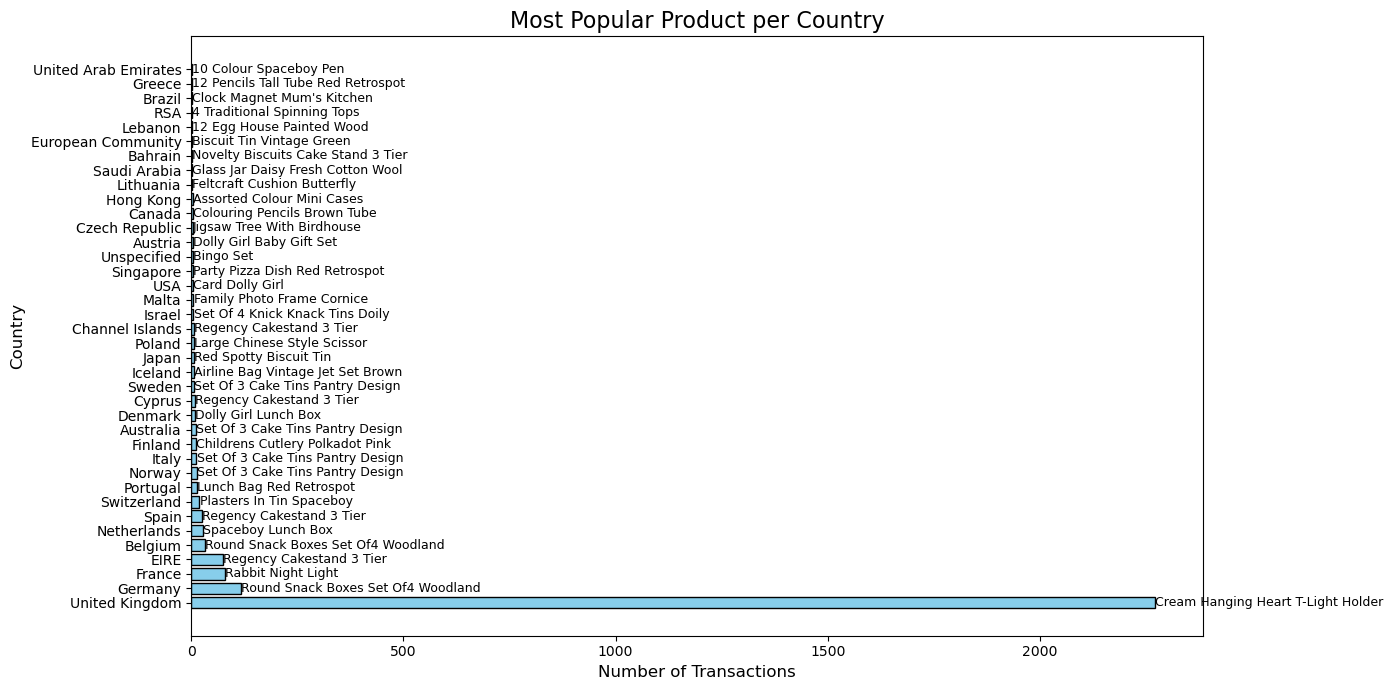

In [243]:

plt.figure(figsize=(14, 7))
bars = plt.barh(
    top_products["Country"], 
    top_products["TransactionNo"], 
    color="skyblue", 
    edgecolor="black"
)

plt.title("Most Popular Product per Country", fontsize=16)
plt.xlabel("Number of Transactions", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Annotate bars with product names
for bar, product in zip(bars, top_products["ProductName"]):
    width = bar.get_width()
    plt.text(
        width + 0.5,               # x position
        bar.get_y() + bar.get_height() / 2,  # y position
        product, 
        va='center', 
        fontsize=9
    )

plt.tight_layout()
plt.show()



In [473]:
repeat_cust = df.groupby(["CustomerNo","Country"])["TransactionNo"].count()
repeat_cust = repeat_cust.groupby(["CustomerNo"]).head(1).sort_values(ascending=False)


repeat_cust

CustomerNo  Country       
17841.0     United Kingdom    7967
14911.0     EIRE              5800
14096.0     United Kingdom    5093
12748.0     United Kingdom    4627
14606.0     United Kingdom    2773
                              ... 
14025.0     United Kingdom       1
16953.0     United Kingdom       1
12791.0     Netherlands          1
13674.0     United Kingdom       1
16579.0     United Kingdom       1
Name: TransactionNo, Length: 4738, dtype: int64

In [475]:
repeat_cust = repeat_cust.groupby("Country").count().sort_values(ascending=False)
repeat_cust


Country
United Kingdom          4324
Germany                   92
France                    87
Spain                     23
Belgium                   22
Switzerland               21
Portugal                  18
EIRE                      13
Italy                     12
Finland                   12
Netherlands                9
Australia                  9
Denmark                    9
Norway                     8
Japan                      8
Sweden                     7
Channel Islands            7
Unspecified                7
Cyprus                     6
Austria                    6
Poland                     5
Israel                     4
Canada                     4
USA                        4
Hong Kong                  4
Bahrain                    2
United Arab Emirates       2
Malta                      2
Greece                     2
Brazil                     1
Czech Republic             1
RSA                        1
Singapore                  1
Saudi Arabia               1
Lithua

In [163]:
l = set([x[-4:] for x in df["Date"]])
l

#just making sure the data is between 2019 and 2018


{'2018', '2019'}

In [205]:
canceled_orders = df[df["Quantity"] <= 0]
canceled_orders["Canceled_orders"].count()

8585

In [395]:
canceled_orders_country = canceled_orders.groupby(["Country","CustomerNo"])["Quantity"].count().sort_values(ascending=False)
canceled_orders_country

Country         CustomerNo
EIRE            14911.0       220
United Kingdom  17841.0       132
                15311.0       112
                17511.0       111
USA             12607.0       101
                             ... 
United Kingdom  15208.0         1
                15213.0         1
                15228.0         1
                15241.0         1
                18282.0         1
Name: Quantity, Length: 1533, dtype: int64

In [167]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


<Axes: >

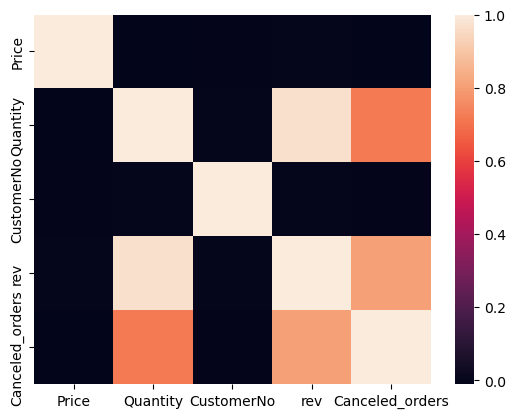

In [573]:
sn.heatmap(df.corr(numeric_only = True))

In [485]:
df["rev"] = df['Price'] * df['Quantity']
revenue = df[df["rev"] >=0 ]
revenue.drop(columns=["Canceled_orders"],axis = 1, inplace = True)
revenue.nunique() 



C:\Users\kajoo\AppData\Local\Temp\ipykernel_17032\2658791440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue.drop(columns=["Canceled_orders"],axis = 1, inplace = True)


TransactionNo    19790
Date               305
ProductNo         3753
ProductName       3753
Price              514
Quantity           375
CustomerNo        4718
Country             38
rev               5626
dtype: int64

In [487]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,rev,Canceled_orders
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,12
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,36
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,12
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,12
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,6


In [725]:
len(df[df["Quantity"] <= 0 ])

8585

In [175]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,rev,Canceled_orders
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,12
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,36
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,12
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,12
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,6


In [177]:
df1 = df[df["Quantity"] >0]
df1

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,rev,Canceled_orders
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,12
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,36
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,12
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,12
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,6
...,...,...,...,...,...,...,...,...,...,...
536320,536585,12/1/2018,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom,40.90,2
536321,536590,12/1/2018,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom,20.45,1
536322,536590,12/1/2018,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom,40.90,2
536323,536591,12/1/2018,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom,20.45,1


In [179]:
df1["rev"] < 0

0         False
1         False
2         False
3         False
4         False
          ...  
536320    False
536321    False
536322    False
536323    False
536324    False
Name: rev, Length: 527765, dtype: bool

In [181]:
df1

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,rev,Canceled_orders
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,12
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,36
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,12
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,12
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,6
...,...,...,...,...,...,...,...,...,...,...
536320,536585,12/1/2018,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom,40.90,2
536321,536590,12/1/2018,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom,20.45,1
536322,536590,12/1/2018,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom,40.90,2
536323,536591,12/1/2018,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom,20.45,1


In [185]:
c= 0 
for x in df1["Canceled_orders"]: 
    if x <0:
        c+=1
print(c)

0


In [189]:
df1.drop("Canceled_orders", axis=1, inplace=True)
df1

C:\Users\kajoo\AppData\Local\Temp\ipykernel_17032\593579681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop("Canceled_orders", axis=1, inplace=True)


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,rev
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64
...,...,...,...,...,...,...,...,...,...
536320,536585,12/1/2018,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom,40.90
536321,536590,12/1/2018,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom,20.45
536322,536590,12/1/2018,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom,40.90
536323,536591,12/1/2018,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom,20.45


In [501]:
df1["Date"] = pd.to_datetime(df1["Date"])
df1["Date"]

C:\Users\kajoo\AppData\Local\Temp\ipykernel_17032\3310541652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Date"] = pd.to_datetime(df1["Date"])


0        2019-12-09
1        2019-12-09
2        2019-12-09
3        2019-12-09
4        2019-12-09
            ...    
536320   2018-12-01
536321   2018-12-01
536322   2018-12-01
536323   2018-12-01
536324   2018-12-01
Name: Date, Length: 527765, dtype: datetime64[ns]

<Axes: xlabel='Date'>

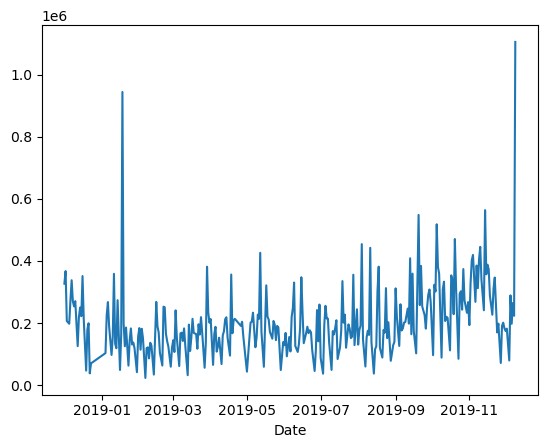

In [557]:
pd.set_option('display.float_format', '{:.0f}'.format)
overall_sales = df1.groupby(df1["Date"].dt.date)["rev"].sum()
overall_sales.plot()

<Axes: >

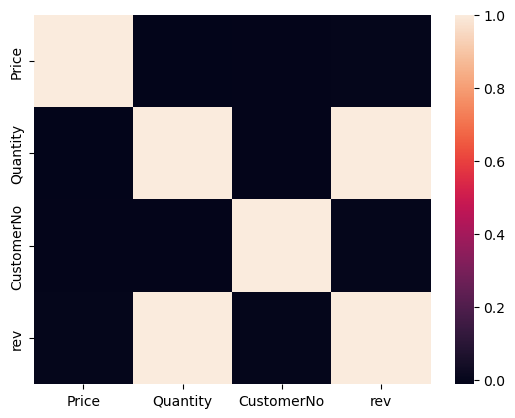

In [575]:
sn.heatmap(df1.corr(numeric_only = True))

In [579]:
df1.drop("rev", axis = 1, inplace = True)
df1.head()

C:\Users\kajoo\AppData\Local\Temp\ipykernel_17032\2510756370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop("rev", axis = 1, inplace = True)


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21,12,17490,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,11,36,13069,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,12,12,13069,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,11,12,13069,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,12,6,13069,United Kingdom


In [581]:
df1.duplicated().sum()

5163

In [583]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

C:\Users\kajoo\AppData\Local\Temp\ipykernel_17032\1713408360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


0

In [587]:
df1.shape

(522602, 8)

In [591]:
df1.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       1
Country          0
dtype: int64

In [599]:
df1.dropna(inplace=True)

C:\Users\kajoo\AppData\Local\Temp\ipykernel_17032\3614008390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [601]:
df1.shape

(522601, 8)

In [607]:
country_counts = df1["Country"].value_counts()
print(country_counts)

Country
United Kingdom          472716
France                   10377
Germany                  10221
EIRE                      7783
Belgium                   2507
Spain                     2382
Netherlands               2326
Switzerland               2297
Portugal                  1830
Australia                 1629
Norway                     927
Austria                    884
Iceland                    785
Finland                    686
Italy                      624
Channel Islands            620
Cyprus                     563
Unspecified                443
Sweden                     408
Denmark                    408
Israel                     353
Japan                      337
USA                        266
Singapore                  215
Poland                     173
Hong Kong                  149
Canada                     149
Malta                      135
Greece                      67
United Arab Emirates        67
RSA                         57
European Community          57


In [609]:
threshold = 0.01 * len(df1)
common_countries = country_counts[country_counts >= threshold].index
common_countries

Index(['United Kingdom', 'France', 'Germany', 'EIRE'], dtype='object', name='Country')

In [611]:
df1["Country_clean"] = df1["Country"].apply(lambda x: x if x in common_countries else "Other")

df1.head()

C:\Users\kajoo\AppData\Local\Temp\ipykernel_17032\1153923507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Country_clean"] = df1["Country"].apply(lambda x: x if x in common_countries else "Other")


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Country_clean
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21,12,17490,United Kingdom,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,11,36,13069,United Kingdom,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,12,12,13069,United Kingdom,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,11,12,13069,United Kingdom,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,12,6,13069,United Kingdom,United Kingdom


In [615]:
df1.drop("Country", axis= 1, inplace = True)
df1.head()

C:\Users\kajoo\AppData\Local\Temp\ipykernel_17032\252272169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop("Country", axis= 1, inplace = True)


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country_clean
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21,12,17490,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,11,36,13069,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,12,12,13069,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,11,12,13069,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,12,6,13069,United Kingdom


In [617]:
df1.shape

(522601, 8)

In [635]:
df1_encoded = pd.get_dummies(df1, columns=["Country_clean"], drop_first=True, dtype=int)
df1_encoded.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country_clean_France,Country_clean_Germany,Country_clean_Other,Country_clean_United Kingdom
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21,12,17490,0,0,0,1
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,11,36,13069,0,0,0,1
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,12,12,13069,0,0,0,1
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,11,12,13069,0,0,0,1
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,12,6,13069,0,0,0,1


In [671]:
p_names=df1_encoded["ProductName"].value_counts()
p_names


ProductName
Cream Hanging Heart T-Light Holder     2324
Jumbo Bag Red Retrospot                2112
Regency Cakestand 3 Tier               2010
Party Bunting                          1701
Lunch Bag Red Retrospot                1584
                                       ... 
Crochet Lilac/Red Bear Keyring            1
Purple/Turq Flowers Handbag               1
Pink Crystal Guitar Phone Charm           1
Purple Anemone Artificial Flower          1
Pink Marshmallow Scarf Knitting Kit       1
Name: count, Length: 3753, dtype: int64

In [673]:
threshold2 = 1000
common_products = p_names[p_names >= threshold2].index

common_products

Index(['Cream Hanging Heart T-Light Holder', 'Jumbo Bag Red Retrospot',
       'Regency Cakestand 3 Tier', 'Party Bunting', 'Lunch Bag Red Retrospot',
       'Assorted Colour Bird Ornament', 'Popcorn Holder',
       'Set Of 3 Cake Tins Pantry Design', 'Pack Of 72 Retrospot Cake Cases',
       'Lunch Bag Suki Design', 'Lunch Bag Black Skull',
       'Natural Slate Heart Chalkboard', 'Jumbo Bag Vintage Doily',
       'Jumbo Bag Pink Polkadot', 'Heart Of Wicker Small',
       'Jumbo Storage Bag Suki', 'Paper Chain Kit 50'S Christmas',
       'Jumbo Shopper Vintage Red Paisley', 'Lunch Bag Spaceboy Design',
       'Jam Making Set Printed', 'Lunch Bag Cars Blue', 'Spotty Bunting',
       'Jam Making Set With Jars', 'Recipe Box Pantry Yellow Design',
       'Lunch Bag Vintage Doily', 'Wooden Picture Frame White Finish',
       'Lunch Bag Pink Polkadot', 'Set Of 4 Pantry Jelly Moulds',
       'Roses Regency Teacup And Saucer', 'Alarm Clock Bakelike Red',
       'Lunch Bag Apple Design', 'Red 

In [691]:
df1_encoded["Product_name"] = df1_encoded['ProductName'].apply(lambda x: x if x in common_products else "Other_product")
df1_encoded


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country_clean_France,Country_clean_Germany,Country_clean_Other,Country_clean_United Kingdom,Product_name
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21,12,17490,0,0,0,1,Other_product
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,11,36,13069,0,0,0,1,Other_product
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,12,12,13069,0,0,0,1,Other_product
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,11,12,13069,0,0,0,1,Other_product
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,12,6,13069,0,0,0,1,Other_product
...,...,...,...,...,...,...,...,...,...,...,...,...
536320,536585,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20,2,17460,0,0,0,1,Other_product
536321,536590,2018-12-01,22776,Sweetheart 3 Tier Cake Stand,20,1,13065,0,0,0,1,Other_product
536322,536590,2018-12-01,22622,Box Of Vintage Alphabet Blocks,20,2,13065,0,0,0,1,Other_product
536323,536591,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20,1,14606,0,0,0,1,Other_product


In [687]:
v=df1_encoded[df1_encoded['Product_name'] !="Other_product"].shape
v

(47177, 12)

In [693]:
df2_encoded = pd.get_dummies(df1_encoded, columns=["Product_name"], drop_first=True, dtype=int)
df2_encoded.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country_clean_France,Country_clean_Germany,Country_clean_Other,...,Product_name_Recipe Box Pantry Yellow Design,Product_name_Red Retrospot Charlotte Bag,Product_name_Regency Cakestand 3 Tier,Product_name_Roses Regency Teacup And Saucer,Product_name_Set Of 3 Cake Tins Pantry Design,Product_name_Set Of 4 Pantry Jelly Moulds,Product_name_Set/20 Red Retrospot Paper Napkins,Product_name_Spotty Bunting,Product_name_Victorian Glass Hanging T-Light,Product_name_Wooden Picture Frame White Finish
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21,12,17490,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,11,36,13069,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,12,12,13069,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,11,12,13069,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,12,6,13069,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [695]:
df2_encoded.drop("ProductName",axis =1, inplace = True)
df2_encoded.shape

(522601, 47)

In [717]:
df2_encoded.columns = df2_encoded.columns.str.strip().str.replace("Product_name_", "")
df2_encoded.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'Price', 'Quantity', 'CustomerNo',
       'Country_clean_France', 'Country_clean_Germany', 'Country_clean_Other',
       'Country_clean_United Kingdom', 'Assorted Colour Bird Ornament',
       'Cream Hanging Heart T-Light Holder', 'Green Regency Teacup And Saucer',
       'Heart Of Wicker Small', 'Jam Making Set Printed',
       'Jam Making Set With Jars', 'Jumbo Bag Pink Polkadot',
       'Jumbo Bag Red Retrospot', 'Jumbo Bag Vintage Doily',
       'Jumbo Shopper Vintage Red Paisley', 'Jumbo Storage Bag Suki',
       'Lunch Bag Apple Design', 'Lunch Bag Black Skull',
       'Lunch Bag Cars Blue', 'Lunch Bag Pink Polkadot',
       'Lunch Bag Red Retrospot', 'Lunch Bag Spaceboy Design',
       'Lunch Bag Suki Design', 'Lunch Bag Vintage Doily',
       'Lunch Bag Woodland', 'Natural Slate Heart Chalkboard', 'Other_product',
       'Pack Of 72 Retrospot Cake Cases', 'Paper Chain Kit 50'S Christmas',
       'Party Bunting', 'Popcorn Holder', 'Ra

In [719]:
df2_encoded.columns = df2_encoded.columns.str.strip().str.replace("Country_clean_", "")
df2_encoded.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'Price', 'Quantity', 'CustomerNo',
       'France', 'Germany', 'Other', 'United Kingdom',
       'Assorted Colour Bird Ornament', 'Cream Hanging Heart T-Light Holder',
       'Green Regency Teacup And Saucer', 'Heart Of Wicker Small',
       'Jam Making Set Printed', 'Jam Making Set With Jars',
       'Jumbo Bag Pink Polkadot', 'Jumbo Bag Red Retrospot',
       'Jumbo Bag Vintage Doily', 'Jumbo Shopper Vintage Red Paisley',
       'Jumbo Storage Bag Suki', 'Lunch Bag Apple Design',
       'Lunch Bag Black Skull', 'Lunch Bag Cars Blue',
       'Lunch Bag Pink Polkadot', 'Lunch Bag Red Retrospot',
       'Lunch Bag Spaceboy Design', 'Lunch Bag Suki Design',
       'Lunch Bag Vintage Doily', 'Lunch Bag Woodland',
       'Natural Slate Heart Chalkboard', 'Other_product',
       'Pack Of 72 Retrospot Cake Cases', 'Paper Chain Kit 50'S Christmas',
       'Party Bunting', 'Popcorn Holder', 'Rabbit Night Light',
       'Recipe Box Pantry Yellow Desi

In [721]:
df2_encoded.columns = df2_encoded.columns.str.replace(" ","_")
df2_encoded.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'Price', 'Quantity', 'CustomerNo',
       'France', 'Germany', 'Other', 'United_Kingdom',
       'Assorted_Colour_Bird_Ornament', 'Cream_Hanging_Heart_T-Light_Holder',
       'Green_Regency_Teacup_And_Saucer', 'Heart_Of_Wicker_Small',
       'Jam_Making_Set_Printed', 'Jam_Making_Set_With_Jars',
       'Jumbo_Bag_Pink_Polkadot', 'Jumbo_Bag_Red_Retrospot',
       'Jumbo_Bag_Vintage_Doily', 'Jumbo_Shopper_Vintage_Red_Paisley',
       'Jumbo_Storage_Bag_Suki', 'Lunch_Bag_Apple_Design',
       'Lunch_Bag_Black_Skull', 'Lunch_Bag_Cars_Blue',
       'Lunch_Bag_Pink_Polkadot', 'Lunch_Bag_Red_Retrospot',
       'Lunch_Bag_Spaceboy_Design', 'Lunch_Bag_Suki_Design',
       'Lunch_Bag_Vintage_Doily', 'Lunch_Bag_Woodland',
       'Natural_Slate_Heart_Chalkboard', 'Other_product',
       'Pack_Of_72_Retrospot_Cake_Cases', 'Paper_Chain_Kit_50'S_Christmas',
       'Party_Bunting', 'Popcorn_Holder', 'Rabbit_Night_Light',
       'Recipe_Box_Pantry_Yellow_Desi

In [727]:
df2_encoded["rev"] = df2_encoded["Price"] * df2_encoded["Quantity"]
df2_encoded.head()

,TransactionNo,Date,ProductNo,Price,Quantity,CustomerNo,France,Germany,Other,United_Kingdom,...,Red_Retrospot_Charlotte_Bag,Regency_Cakestand_3_Tier,Roses_Regency_Teacup_And_Saucer,Set_Of_3_Cake_Tins_Pantry_Design,Set_Of_4_Pantry_Jelly_Moulds,Set/20_Red_Retrospot_Paper_Napkins,Spotty_Bunting,Victorian_Glass_Hanging_T-Light,Wooden_Picture_Frame_White_Finish,rev
0,581482,2019-12-09,22485,21,12,17490,0,0,0,1,...,0,0,0,0,0,0,0,0,0,258
1,581475,2019-12-09,22596,11,36,13069,0,0,0,1,...,0,0,0,0,0,0,0,0,0,383
2,581475,2019-12-09,23235,12,12,13069,0,0,0,1,...,0,0,0,0,0,0,0,0,0,138
3,581475,2019-12-09,23272,11,12,13069,0,0,0,1,...,0,0,0,0,0,0,0,0,0,128
4,581475,2019-12-09,23239,12,6,13069,0,0,0,1,...,0,0,0,0,0,0,0,0,0,72


In [737]:
purchase_counts = df2_encoded.groupby("CustomerNo")["TransactionNo"].nunique()

customer_type = purchase_counts.apply(lambda x: "Repeat" if x > 1 else "One-time")

df2_encoded["CustomerType"] = df2_encoded["CustomerNo"].map(customer_type)


In [739]:
customer_sales = df2_encoded.groupby(["CustomerNo", "CustomerType"])["rev"].sum().reset_index()
customer_sales

,CustomerNo,CustomerType,rev
0,12004,One-time,1510
1,12006,One-time,25
2,12008,One-time,5690
3,12013,One-time,70
4,12024,One-time,150
...,...,...,...
4713,18280,One-time,623
4714,18281,One-time,577
4715,18282,Repeat,1045
4716,18283,Repeat,11774


In [741]:
one_time = customer_sales[customer_sales["CustomerType"] == "One-time"]["rev"]
repeat = customer_sales[customer_sales["CustomerType"] == "Repeat"]["rev"]


In [745]:
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(repeat, one_time, equal_var=False)  #t-test
print("t-statistic:", t_stat)
print("p-value:", p_val)

print(p_val >= 0.05)

t-statistic: 11.330895867591686
p-value: 2.3654966762774594e-29
False


C:\Users\kajoo\AppData\Local\Temp\ipykernel_17032\3387166797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x="CustomerType", y="rev", data=customer_sales, palette="Set2")


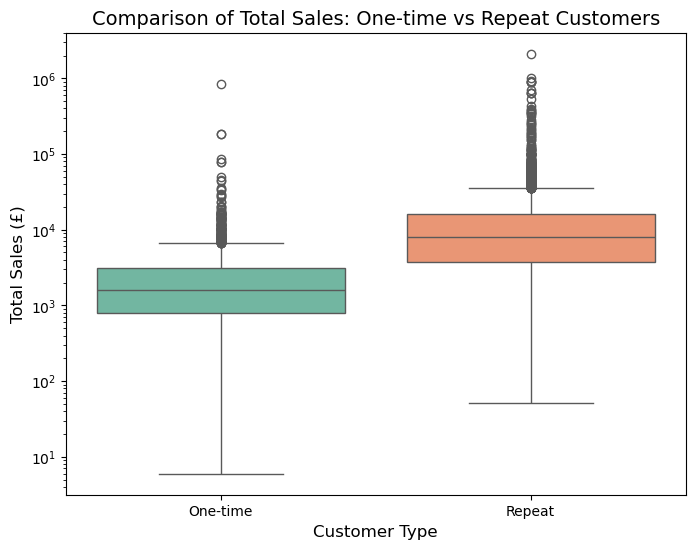

In [749]:
plt.figure(figsize=(8,6))
sn.boxplot(x="CustomerType", y="rev", data=customer_sales, palette="Set2")

plt.title("Comparison of Total Sales: One-time vs Repeat Customers", fontsize=14)
plt.xlabel("Customer Type", fontsize=12)
plt.ylabel("Total Sales (£)", fontsize=12)
plt.yscale("log")  # optional: use log scale if sales values are very skewed
plt.show()
